In [30]:
from scipy.stats import zscore, norm, probplot
from loading_data import *
from scipy.linalg import svd
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
normalised_X = np.copy(X)
#transform
normalised_X[:,6] = np.log(1 + X[:,6]) #add 1 because some alcohol values are 0
#normalise
normalised_X = zscore(normalised_X, axis = 0, ddof = 1)

attributeNames_norm = np.copy(attributeNames)
attributeNames_norm[6] = 'log-alc'
attributeNames_norm = ['normalized ' + attribute for attribute in attributeNames_norm]

#Or without the last binary data

Y = np.copy(normalised_X[:,:-1])
N_y, M_y = Y.shape

attributeNames_y = np.copy(attributeNames_norm[:-1])

## Performing PCA

In [32]:

# PCA by computing SVD of Y
U, S, Vh = svd(Y, full_matrices=False)

# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T

# Compute variance explained by principal components 
rho = (S * S) / (S * S).sum()

threshold = 0.9

## Amount of variance explained by the PCA components

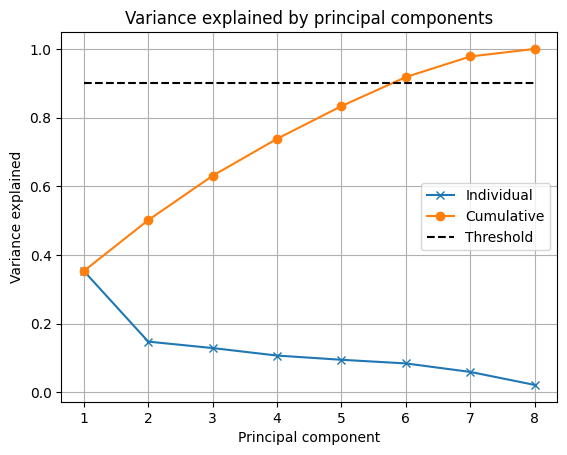

In [33]:
# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()

## Projected data

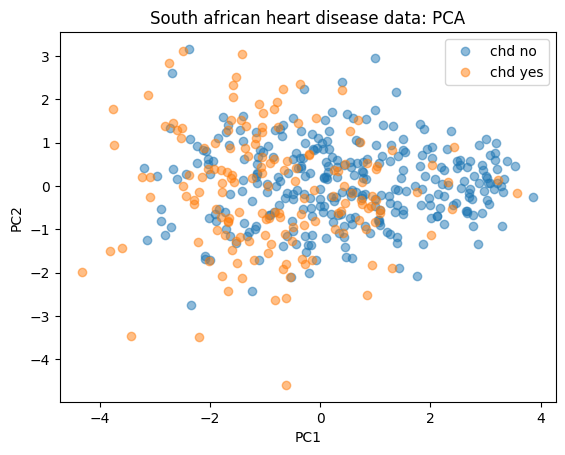

In [34]:
Z = Y @ V

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = plt.figure()
plt.title("South african heart disease data: PCA")
# Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plt.plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.5)
plt.legend(classNames)
plt.xlabel("PC{0}".format(i + 1))
plt.ylabel("PC{0}".format(j + 1))

# Output result to screen
plt.show()

## PCA components analysis

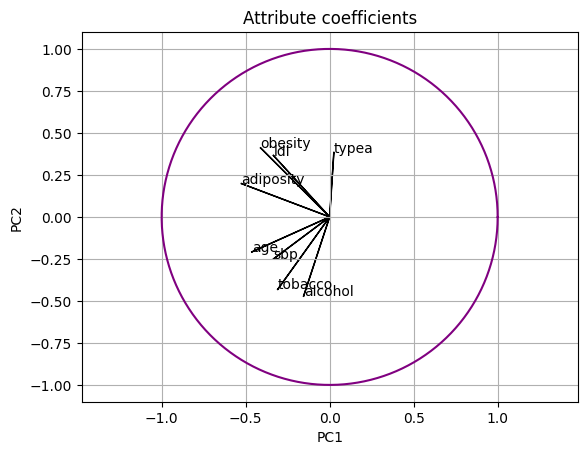

In [35]:

threshold = 0.9
# Choose two PCs to plot (the projection)
i = 0
j = 1

# Make the plot
plt.figure()
# Plot attribute coefficients in principal component space
for att in range(V.shape[1]):
    plt.arrow(0, 0, V[att, i], V[att, j])
    plt.text(V[att, i], V[att, j], attributeNames[att])
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel("PC" + str(i + 1))
plt.ylabel("PC" + str(j + 1))
plt.grid()
# Add a unit circle
plt.plot(
    np.cos(np.arange(0, 2 * np.pi, 0.01)), np.sin(np.arange(0, 2 * np.pi, 0.01)), color = 'purple'
)
plt.title("Attribute coefficients")
plt.axis("equal")

plt.show()

Have to keep in mind that PC1 and PC2 only account for roughly 50% of the variance in the data.

In [36]:
#We print the principal compenents
print( f'PC1 : {dict(zip(attributeNames_y, np.round(V[:,0],3) ))}' )
print( f'PC2 : {dict(zip(attributeNames_y, np.round(V[:,1],3) ))}' )

PC1 : {'normalized sbp': -0.334, 'normalized tobacco': -0.309, 'normalized ldl': -0.334, 'normalized adiposity': -0.524, 'normalized typea': 0.025, 'normalized obesity': -0.411, 'normalized log-alc': -0.155, 'normalized age': -0.462}
PC2 : {'normalized sbp': -0.249, 'normalized tobacco': -0.431, 'normalized ldl': 0.365, 'normalized adiposity': 0.198, 'normalized typea': 0.383, 'normalized obesity': 0.41, 'normalized log-alc': -0.471, 'normalized age': -0.208}


#### Or another way

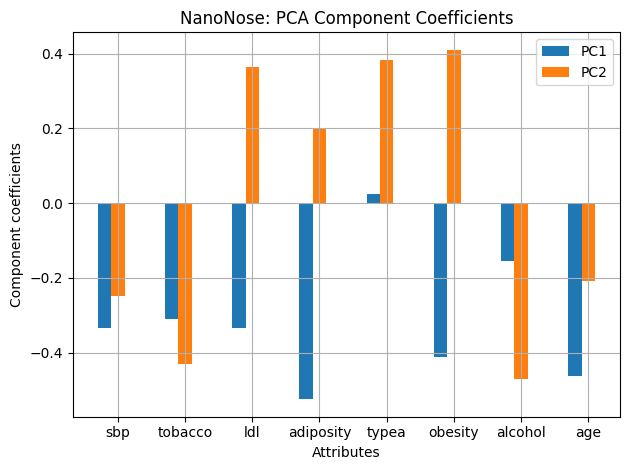

In [42]:
# We saw in 2.1.3 that the first 3 components explaiend more than 90
# percent of the variance. Let's look at their coefficients:
pcs = [0, 1]
legendStrs = ["PC" + str(e + 1) for e in pcs]
bw = 0.2
r = np.arange(1, M_y + 1)

for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw)

plt.xticks(r + bw, attributeNames[:-1])
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("NanoNose: PCA Component Coefficients")
plt.tight_layout()
plt.show()